In [1]:
%reset -f
from pythonrc import *

In [2]:
def initialize_allocator(
    allocator_type: skadipy.allocator.AllocatorBase, **kwargs
) -> skadipy.allocator.AllocatorBase:
    return allocator_type(
        actuators=[
            tunnel,
            voithschneider_port,
            voithschneider_starboard
        ],
        force_torque_components=[
            skadipy.allocator.ForceTorqueComponent.X,
            skadipy.allocator.ForceTorqueComponent.Y,
            skadipy.allocator.ForceTorqueComponent.N,
        ],
        **kwargs,
    )


time_step = 0.1
types = [skadipy.allocator.reference_filters.MinimumMagnitude,
         skadipy.allocator.reference_filters.MinimumMagnitude,
         skadipy.allocator.reference_filters.MinimumMagnitude]
cbf = [
    skadipy.safety.ControlBarrierFunctionType.SUMSQUARE,
    skadipy.safety.ControlBarrierFunctionType.SUMSQUARE,
    skadipy.safety.ControlBarrierFunctionType.SUMSQUARE
]
gamma = [1e-5, 1e-5, 1e-5]
mu = [1e-1, 1e-3, 1e-5]
rho = [1e2, 1e4, 1e6]


def initialize_allocators():
    a = []
    for t, c, g, m, r in zip(types, cbf, gamma, mu, rho):
        allocator = initialize_allocator(
            allocator_type=t, gamma=g, mu=m, rho=r, time_step=time_step, control_barrier_function=c
        )

        a.append(allocator)
    return a

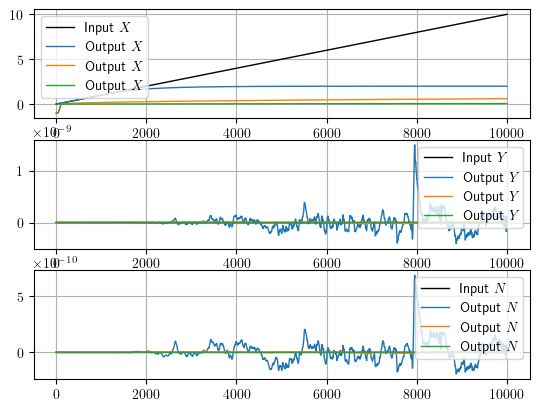

In [3]:
n = 10000
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10,  0, 0, 0, 0, 0),
    n
)
xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

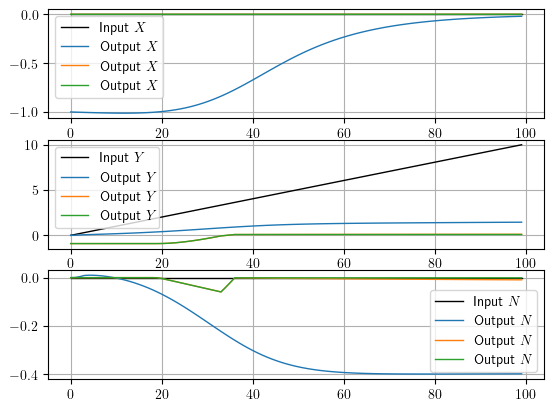

In [4]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (0,  10, 0, 0, 0, 0),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

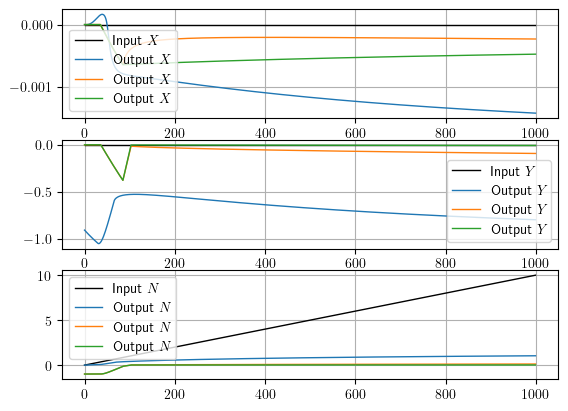

In [5]:
n = 1000
tau_cmd = np.linspace(
    (0, 0, 0, 0, 0, 0),
    (0, 0, 0, 0, 0, 10),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

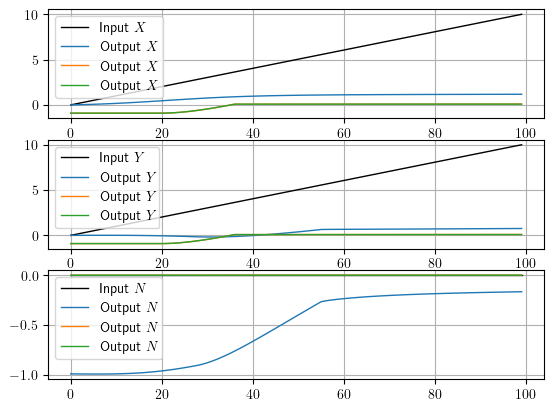

In [6]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10, 10, 0, 0, 0, 0),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)

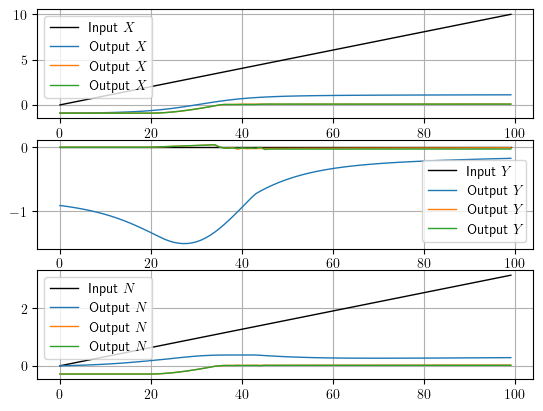

In [7]:
n = 100
tau_cmd = np.linspace(
    (0,   0, 0, 0, 0, 0),
    (10,  0, 0, 0, 0, np.pi),
    n
)

xi_hist, theta_hist, tau_hist = run_tests(tau_cmd, allocators=initialize_allocators())
plot_histories(tau_cmd=tau_cmd, tau_alloc=tau_hist)